# Analyzing Covid Data and World Happiness Record Data
<br>
The data spans 1/22/2020 - 1/26/2023
<br>
<br>

**Project Purpose:**
<br>
Several media sources and the World Health Organization have accused China of under-reporting covid data.  The purpose of this project is to compare global covid data and World Happiness Report data to create an unbiased analysis of the data and identify any possible reasons that the data may differ.  The USA, United Kingdom, and Sweden have been selected as a baseline. India was selected for its population and geographic similarity and proximity to China.
<br>
<br>
**Analysis Summary:**
<br>
Time-series covid death and infection rates between the United Kingdom, United States, and Sweden are positively correlated.  Peaks and troughs occur in tandem.  This may be due to the seasonality of the covid-19 virus and the climate similarities of the United Kingdom, Sweden and much of the continental United States.  India's spikes in infection and death rates occur at different dates possibly caused by varying virus seasonality due to climate.  The baseline countries also exhibit a consistent correlation and pattern between spikes in infection and death rates proportionally.  India also dsplays this pattern, however, not as consistently.  India's data includes disproportionate surges in death rates to corresponding surges in infection rates.  This could be due to many non-lethal covid infections going undiagnosed. 
China’s infection and death rates do not follow the trends seen in the other five countries.  In March and April of 2022 China experienced a large increase in infection rate but there was no significant increase in the death rate.  While other countries display seasonality of the virus China does not.  From early 2020 to late 2021 infection rates stay very close to the x-axis, virtually no infections.  The death rate displayed the same trend but remained unchanged until late 2022.  At the end of 2022 and into 2023 China’s death rate climbed to about 60,000 in a very short period of time.  It does correlate with a spike in infection rates; however, the infection rate peaked at about 80,000.  This suggests roughly a 75% death rate over this period.  Why?
<br>
<br>
This may be due to China’s zero covid policy and strict regulations from 2020 through 2022.  Civil unrest regarding China’s strict regulations started in November 2022 when large numbers of citizens gathered in protest possibly spreading the virus at an unprecedented rate.  China also has an aging population.  In 2018 more than 17% of the population was reported to be over 60 years old.  With health facilities past capacity, the country experiencing its largest surge in infections since the outbreak, and a large percent of the population being more at risk of serious complications may have created a massive surge in death rate and non-lethal undiagnosed cases.  This would greatly skew the calculated death rate that resulted in ~75%.  The cumulative average death rate for every country is within the expected range, varying from 0.87% - 1.08%.  However, this includes China's +60K death rate post protests otherwise China would be well outside of the expected death rate range.  The analysis concludes that China is an outlier in in the dataset, whatever the reason is.
<br>
<br>
Could the World Happiness Report provide further insight?  Is there a correalation between GDP and covid rates?  Could cultural differences increase risk of covid exposure?  Does freedom to make choices, life expectancy, or social support affect risk level?  
<br>
The covid data in relation to the World Health report initially shows a positive correlation in varying degrees across all categories analyzed when looking at infection rates.  Infection rate vs GDP displays low-moderate correlation and high statistical relevance.  However, in death rate vs GDP the correlation and statistical relevance is weak.  This trend continues for social support, healthy life choices, and freedom to make life choices.  The difference between correlation and statistical relevance of infection rate and death rate against World Health Report data could be due to unrecorded/unreported infections.  Infections that lead to death are more likely to be recorded due to the severity of the case leading to a higher necessity of hospitalization or medical help making death rate more accurate for analysis.  In conclusion, cultural differences does not make one more or less at risk.

<br>

### Loading Libraries for Analysis

<br>


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr as prs
print('Imported.')

Imported.


<br>

#### Importing Covid Infection Data from CSV


In [2]:
corona_dataset_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,1/17/2023,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,208009,208034,208062,208084,208084,208084,208097,208289,208324,208324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334064,334084,334084,334084,334097,334101,334101,334113,334124,334135
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271292,271296,271307,271316,271328,271335,271346,271354,271360,271364
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47781,47781,47820,47820,47820,47820,47820,47820,47820,47820
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105184,105184,105184
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,10024095,10024095,10024095,10024095,10024095,10024095,10032709,10032709,10032709,10032709
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,446008,446008,446008,446008,446008,446008,446008,446008,446008,446008
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,229434,229434,230238,230238,230238,230238,230238,230238,230238,230820


In [3]:
corona_dataset_csv.shape

(289, 1105)

#### Deleting Unecessary Columns

<br>

In [4]:
corona_dataset_csv.drop(["Lat", "Long", "Province/State"], axis = 1, inplace = True)

In [5]:
corona_dataset_csv.head(20)

,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,1/17/2023,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,208009,208034,208062,208084,208084,208084,208097,208289,208324,208324
1,Albania,0,0,0,0,0,0,0,0,0,...,334064,334084,334084,334084,334097,334101,334101,334113,334124,334135
2,Algeria,0,0,0,0,0,0,0,0,0,...,271292,271296,271307,271316,271328,271335,271346,271354,271360,271364
3,Andorra,0,0,0,0,0,0,0,0,0,...,47781,47781,47820,47820,47820,47820,47820,47820,47820,47820
4,Angola,0,0,0,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105184,105184,105184
5,Antarctica,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,Argentina,0,0,0,0,0,0,0,0,0,...,10024095,10024095,10024095,10024095,10024095,10024095,10032709,10032709,10032709,10032709
8,Armenia,0,0,0,0,0,0,0,0,0,...,446008,446008,446008,446008,446008,446008,446008,446008,446008,446008
9,Australia,0,0,0,0,0,0,0,0,0,...,229434,229434,230238,230238,230238,230238,230238,230238,230238,230820


In [6]:
corona_dataset_csv.shape

(289, 1102)

#### Aggregrating Data by Country

<br>

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.shape

(201, 1101)

<br>

#### Importing Covid Death Data from CSV

<br>

In [9]:
corona_deaths = pd.read_csv("Datasets/covid19_deaths_dataset.csv")

corona_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,1/17/2023,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7859,7860,7864,7864,7864,7864,7870,7871,7872,7872
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1931,1931,1931


<br>

#### Deleting Unecessary Columns

<br>

In [10]:
corona_deaths.drop(["Lat", "Long", "Province/State"], axis = 1, inplace = True)
corona_deaths.head()

,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,1/17/2023,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7859,7860,7864,7864,7864,7864,7870,7871,7872,7872
1,Albania,0,0,0,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1931,1931,1931


<br>

#### Aggregrating Data by Country

<br>

In [11]:
corona_deaths_agg = corona_deaths.groupby("Country/Region").sum()

In [12]:
corona_deaths_agg.shape

(201, 1101)

### Visualizing Covid Infections and Deaths
#### Rolling sum of covid Infections

<br>

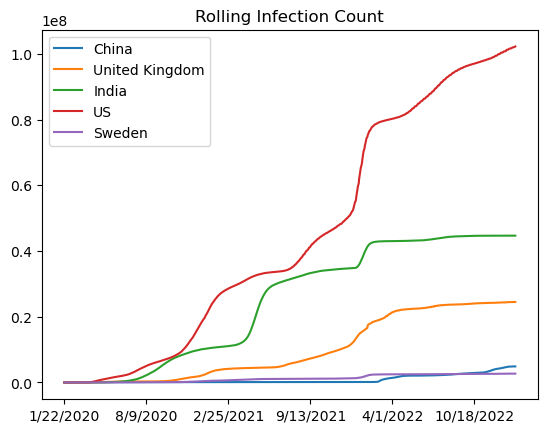

In [20]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["United Kingdom"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["US"].plot()
corona_dataset_aggregated.loc["Sweden"].plot()
plt.title('Rolling Infection Count')
plt.legend()


#### Rolling sum of covid deaths

<br>

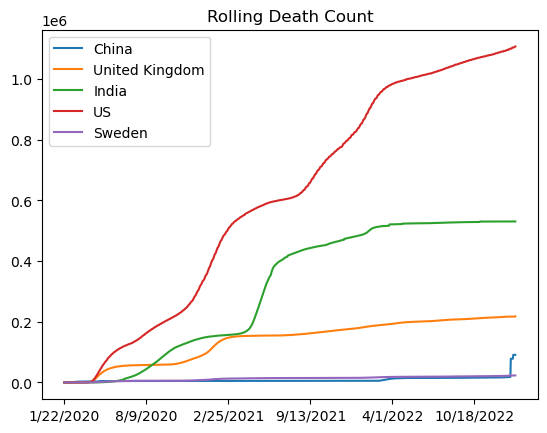

In [19]:
corona_deaths_agg.loc["China"].plot()
corona_deaths_agg.loc["United Kingdom"].plot()
corona_deaths_agg.loc["India"].plot()
corona_deaths_agg.loc["US"].plot()
corona_deaths_agg.loc["Sweden"].plot()
plt.title('Rolling Death Count')
plt.legend()


#### Covid infection rate (new infections within 24 hours)

<br>

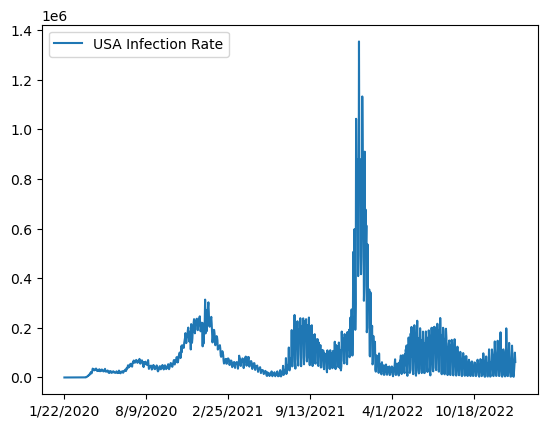

In [351]:
corona_dataset_aggregated.loc["US"].diff().plot()
plt.legend((['USA Infection Rate']), loc='upper left')

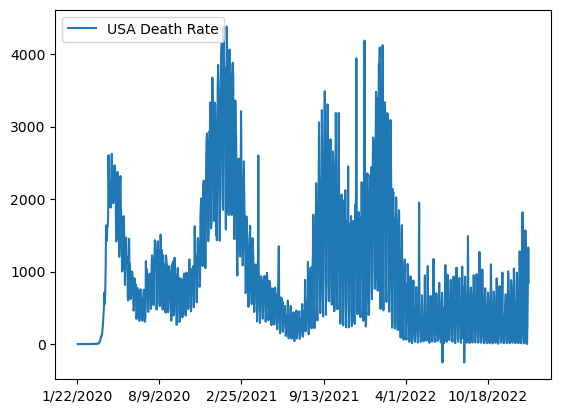

In [352]:
corona_deaths_agg.loc["US"].diff().plot()
plt.legend(['USA Death Rate'], loc='upper left')

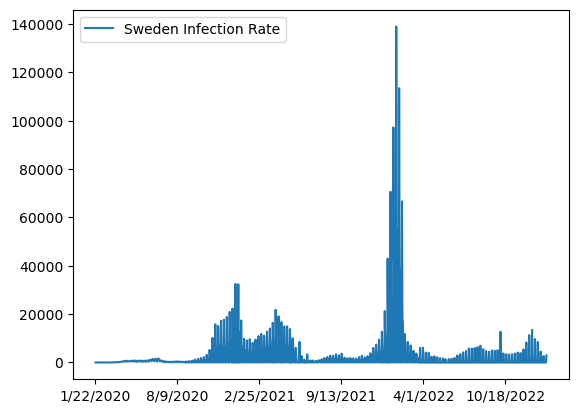

In [353]:
corona_dataset_aggregated.loc["Sweden"].diff().plot()
plt.legend((['Sweden Infection Rate']), loc='upper left')

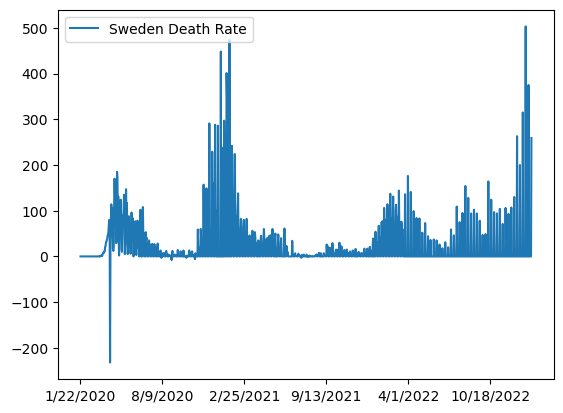

In [354]:
corona_deaths_agg.loc["Sweden"].diff().plot()
plt.legend(['Sweden Death Rate'], loc='upper left')

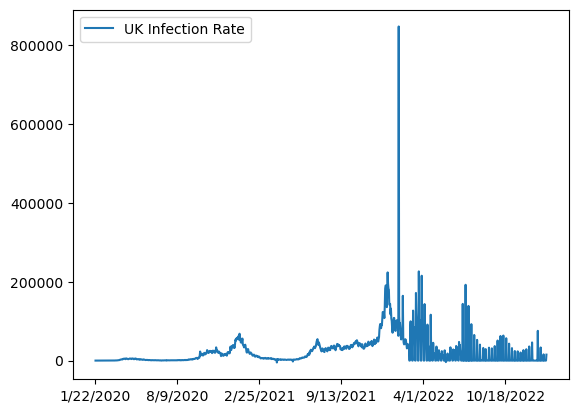

In [355]:
corona_dataset_aggregated.loc["United Kingdom"].diff().plot()
plt.legend((['UK Infection Rate']), loc='upper left')

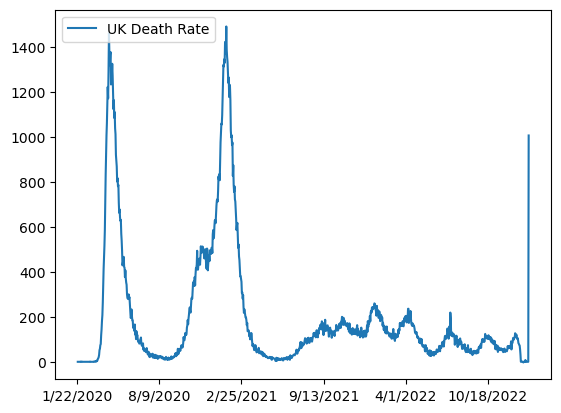

In [367]:
corona_deaths_agg.loc["United Kingdom"].diff().plot()
plt.legend(['UK Death Rate'], loc='upper left')

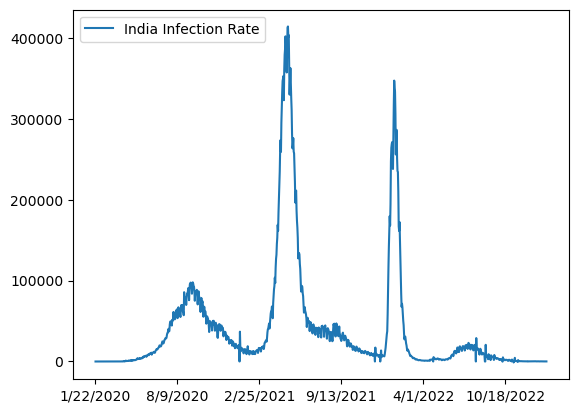

In [329]:
corona_dataset_aggregated.loc["India"].diff().plot()
plt.legend((['India Infection Rate']), loc='upper left')

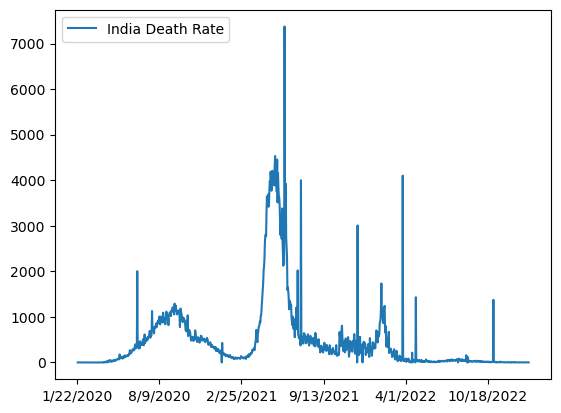

In [330]:
corona_deaths_agg.loc["India"].diff().plot()
plt.legend(['India Death Rate'], loc='upper left')

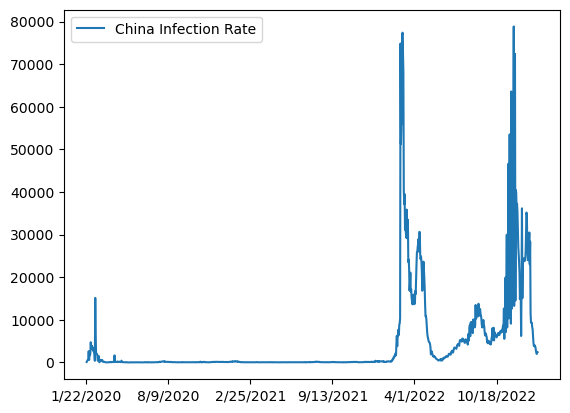

In [331]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.legend((['China Infection Rate']), loc='upper left')

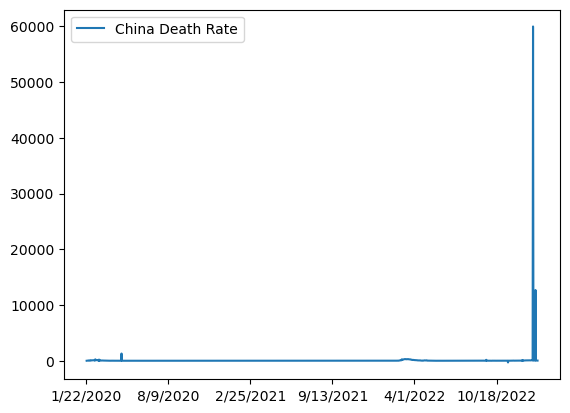

In [332]:
corona_deaths_agg.loc["China"].diff().plot()
plt.legend(['China Death Rate'], loc='upper left')

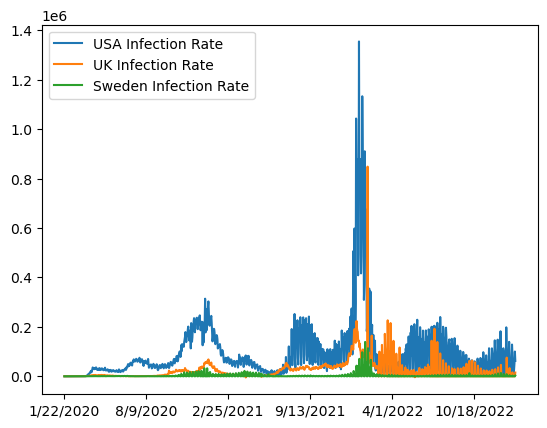

In [333]:
corona_dataset_aggregated.loc["US"].diff().plot()
corona_dataset_aggregated.loc["United Kingdom"].diff().plot()
corona_dataset_aggregated.loc["Sweden"].diff().plot()
plt.legend((['Sweden Infection Rate']), loc='upper left')
plt.legend(['USA Infection Rate', 'UK Infection Rate', 'Sweden Infection Rate'], loc='upper left')

#### Covid death rate (new deaths within 24 hours)

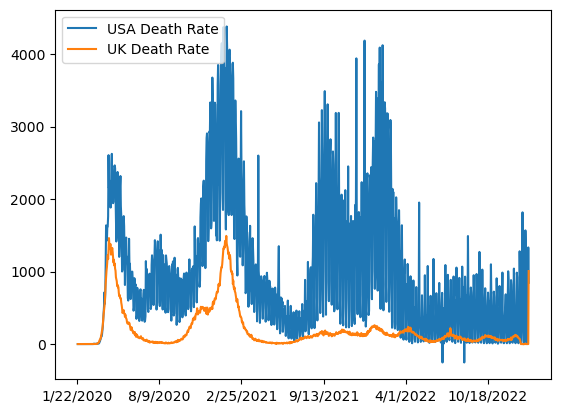

In [334]:
corona_deaths_agg.loc["US"].diff().plot()
corona_deaths_agg.loc["United Kingdom"].diff().plot()
plt.legend(['USA Death Rate', 'UK Death Rate'], loc='upper left')

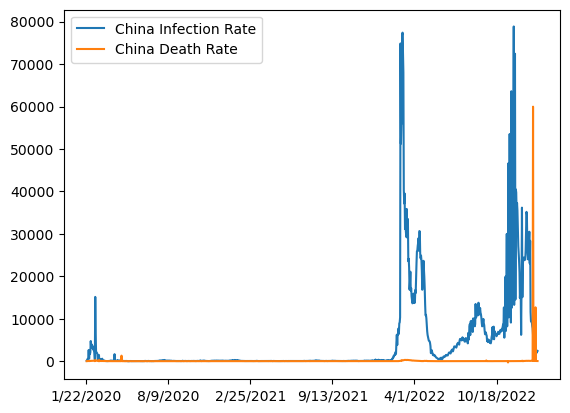

In [335]:
corona_dataset_aggregated.loc["China"].diff().plot()
corona_deaths_agg.loc["China"].diff().plot()
plt.legend(['China Infection Rate', 'China Death Rate'], loc='upper left')

<br>

#### Finding the average cumulative death rate.

<br>

In [303]:
US_Death_Rate = corona_deaths_agg.loc["US"].max() / corona_dataset_aggregated.loc["US"].max() 

print("UsA Death Rate", US_Death_Rate)

UsA Death Rate 0.010830736866542658


In [302]:
UK_Death_Rate = corona_deaths_agg.loc["United Kingdom"].max() / corona_dataset_aggregated.loc["United Kingdom"].max() 

print("UK Death Rate", UK_Death_Rate)

UK Death Rate 0.008896404865132917


In [301]:
Sweden_Death_Rate = corona_deaths_agg.loc["Sweden"].max() / corona_dataset_aggregated.loc["Sweden"].max() 

print("Sweden Death Rate", Sweden_Death_Rate)

Sweden Death Rate 0.008642793019234011


In [304]:
India_Death_Rate = corona_deaths_agg.loc["India"].max() / corona_dataset_aggregated.loc["India"].max() 

print("India Death Rate", India_Death_Rate)

India Death Rate 0.011877697308642637


In [305]:
China_Death_Rate = corona_deaths_agg.loc["China"].max() / corona_dataset_aggregated.loc["China"].max() 

print("UsA Death Rate", US_Death_Rate)

UsA Death Rate 0.010830736866542658


#### Finding max infection rate
<br>

In [220]:
corona_dataset_aggregated.loc["China"].diff().max()

78859.0

In [221]:
corona_dataset_aggregated.loc["Italy"].diff().max()

229122.0

In [222]:
corona_dataset_aggregated.loc["Spain"].diff().max()

372766.0

In [223]:
corona_dataset_aggregated.loc["US"].diff().max()

1354499.0

#### Finding max death rate

<br>

In [224]:
corona_deaths_agg.loc["US"].diff().max()

4381.0

In [225]:
corona_deaths_agg.loc["United Kingdom"].diff().max()

1492.0

In [226]:
corona_deaths_agg.loc["China"].diff().max()

59961.0

In [227]:
corona_deaths_agg.loc["India"].diff().max()

7374.0

### Preparing Covid Data for World Happiness Analysis
<br>

#### Using max infection rate per country to populate into a list and adding the data as column in dataset
<br>


In [228]:
# Creating countries variable and casting index (country) to a list
countries = list(corona_dataset_aggregated.index)
# creating empty list for max infection rate data
max_infection_rate = []
# running loop, every iteration will populate the list with max infection spike for each country
for c in countries :
    max_infection_rate.append(corona_dataset_aggregated.loc[c].diff().max())
# adding the data as a column
corona_dataset_aggregated["max infection rate"] = max_infection_rate

In [229]:
corona_dataset_aggregated.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,208034,208062,208084,208084,208084,208097,208289,208324,208324,3243.0
Albania,0,0,0,0,0,0,0,0,0,0,...,334084,334084,334084,334097,334101,334101,334113,334124,334135,4789.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,271296,271307,271316,271328,271335,271346,271354,271360,271364,2521.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,47781,47820,47820,47820,47820,47820,47820,47820,47820,2313.0
Angola,0,0,0,0,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105184,105184,105184,5035.0


#### Using max death rate per country to populate into a list and adding the data as column in dataset
<br>


In [230]:
countries = list(corona_deaths_agg.index)
max_death_rate = []
for c in countries :
    max_death_rate.append(corona_deaths_agg.loc[c].diff().max())
corona_deaths_agg["max death rate"] = max_death_rate

In [231]:
corona_deaths_agg.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,1/18/2023,1/19/2023,1/20/2023,1/21/2023,1/22/2023,1/23/2023,1/24/2023,1/25/2023,1/26/2023,max death rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7860,7864,7864,7864,7864,7870,7871,7872,7872,159.0
Albania,0,0,0,0,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,21.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,49.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,7.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1931,1931,1931,30.0


#### Creating new dataframes for infection rate and death rate containing countries and corresponding rate.
<br>

In [232]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])

In [233]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,3243.0
Albania,4789.0
Algeria,2521.0
Andorra,2313.0
Angola,5035.0


In [234]:
covid_deaths = pd.DataFrame(corona_deaths_agg['max death rate'])
covid_deaths

,max death rate
Country/Region,
Afghanistan,159.0
Albania,21.0
Algeria,49.0
Andorra,7.0
Angola,30.0
...,...
West Bank and Gaza,268.0
Winter Olympics 2022,0.0
Yemen,60.0


<br>

### Preparing World Happiness Data for Analysis

#### Importing World Happiness Report data

In [235]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [236]:
happiness_report_csv.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [237]:
happiness_report_csv.shape

(149, 20)

#### Dropping unecessary columns

In [238]:
uneeded_col = ["Regional indicator", "Standard error of ladder score", "upperwhisker", 'lowerwhisker', "Ladder score", "Ladder score in Dystopia", "Explained by: Log GDP per capita", "Dystopia + residual", "Explained by: Social support", "Explained by: Perceptions of corruption", "Explained by: Generosity", "Explained by: Freedom to make life choices", "Explained by: Healthy life expectancy", "Generosity", "Perceptions of corruption"]
happiness_report_csv.drop(uneeded_col, axis=1 , inplace=True)

In [239]:
happiness_report_csv.head()

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.775,0.954,72.0,0.949
1,Denmark,10.933,0.954,72.7,0.946
2,Switzerland,11.117,0.942,74.4,0.919
3,Iceland,10.878,0.983,73.0,0.955
4,Netherlands,10.932,0.942,72.4,0.913


<br>

#### Assigning country name as indices (primary key) for joining
<br>

In [240]:
happiness_report_csv.set_index("Country name", inplace=True)

In [241]:
happiness_report_csv.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.775,0.954,72.0,0.949
Denmark,10.933,0.954,72.7,0.946
Switzerland,11.117,0.942,74.4,0.919
Iceland,10.878,0.983,73.0,0.955
Netherlands,10.932,0.942,72.4,0.913


<br>

#### Joining World Happiness Data with Covid Infection Dataframe

<br>

In [242]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,3243.0
Albania,4789.0
Algeria,2521.0
Andorra,2313.0
Angola,5035.0


In [243]:
corona_data.shape

(201, 1)

In [244]:
happiness_report_csv.shape

(149, 4)

#### Due to the difference in structure I will use an inner join 

<br>

In [245]:
data = happiness_report_csv.join(corona_data,how="inner")
data.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Finland,10.775,0.954,72.0,0.949,50889.0
Denmark,10.933,0.954,72.7,0.946,55709.0
Switzerland,11.117,0.942,74.4,0.919,89462.0
Iceland,10.878,0.983,73.0,0.955,7408.0
Netherlands,10.932,0.942,72.4,0.913,380498.0


#### Looking at correlation matrix 

In [246]:
data.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Logged GDP per capita,1.000000,0.798452,0.872090,0.456510,0.322941
Social support,0.798452,1.000000,0.748850,0.486266,0.236806
Healthy life expectancy,0.872090,0.748850,1.000000,0.493911,0.344605
Freedom to make life choices,0.456510,0.486266,0.493911,1.000000,0.052039
max infection rate,0.322941,0.236806,0.344605,0.052039,1.000000


<br>

### Visualizations of Results

<br>

<br>

####  Maximum Infection Rate vs GDP

<br>

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max infection rate'>

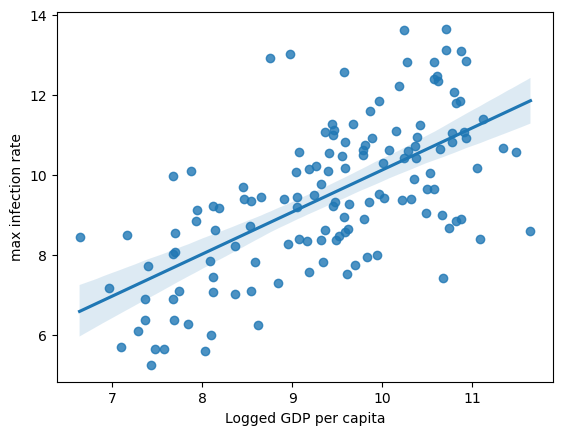

In [247]:
x = data["Logged GDP per capita"]
y = data["max infection rate"]
#sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

####  Maximum Infection rate vs Social Support 

<br>

<AxesSubplot:xlabel='Social support', ylabel='max infection rate'>

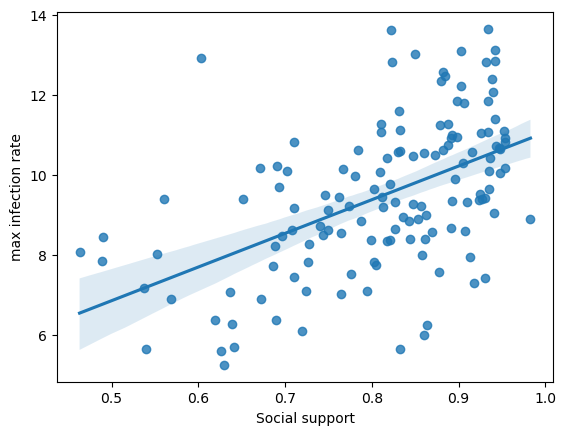

In [248]:
x = data["Social support"]
y = data["max infection rate"]
#sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

#### Maximum Infection Rate vs Healthy Life Expectancy

<br>

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max infection rate'>

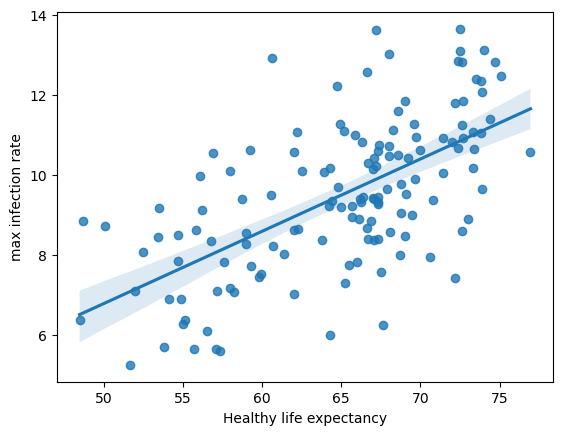

In [249]:
x = data["Healthy life expectancy"]
y = data["max infection rate"]
#sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

#### Maximum Infection Rate vs Freedome to Make Life Choices

<br>

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max infection rate'>

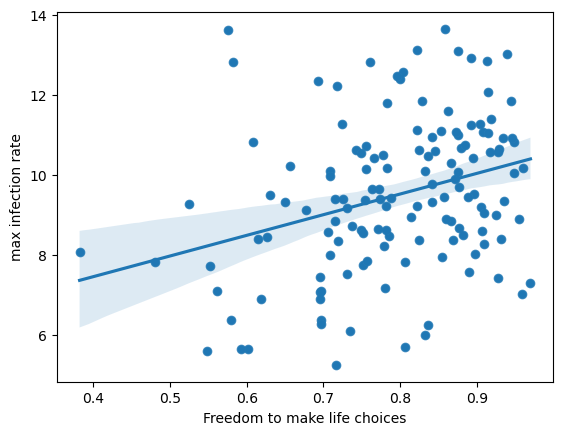

In [250]:
x = data["Freedom to make life choices"]
y = data["max infection rate"]
sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))


### Analyzing Covid Deaths and World Happiness

<br>

#### Joining covid death dataframe and world happiness data

<br>

In [251]:
data2 = happiness_report_csv.join(covid_deaths, how = "inner")
data2.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max death rate
Finland,10.775,0.954,72.0,0.949,330.0
Denmark,10.933,0.954,72.7,0.946,90.0
Switzerland,11.117,0.942,74.4,0.919,131.0
Iceland,10.878,0.983,73.0,0.955,34.0
Netherlands,10.932,0.942,72.4,0.913,234.0


#### Looking at correlation matrix

<br>

In [252]:
data2.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max death rate
Logged GDP per capita,1.000000,0.798452,0.872090,0.456510,0.045441
Social support,0.798452,1.000000,0.748850,0.486266,0.018736
Healthy life expectancy,0.872090,0.748850,1.000000,0.493911,0.094749
Freedom to make life choices,0.456510,0.486266,0.493911,1.000000,0.099712
max death rate,0.045441,0.018736,0.094749,0.099712,1.000000


<br>

### Visualizations of Results

<br>

<br>

#### Max Death Rate vs GDP

<br>

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max death rate'>

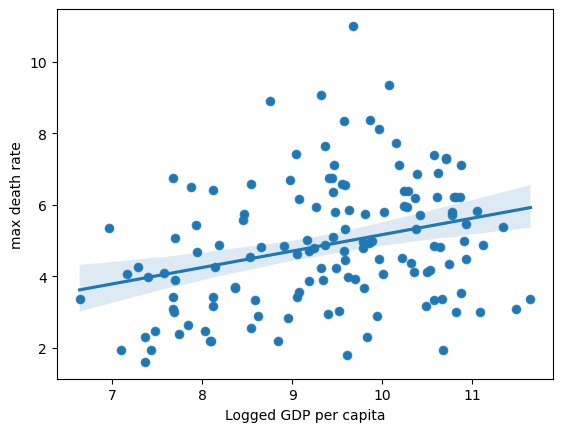

In [253]:
x = data2["Logged GDP per capita"]
y = data2["max death rate"]
sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

#### Max Death Rate vs Social Support

<br>

<AxesSubplot:xlabel='Social support', ylabel='max death rate'>

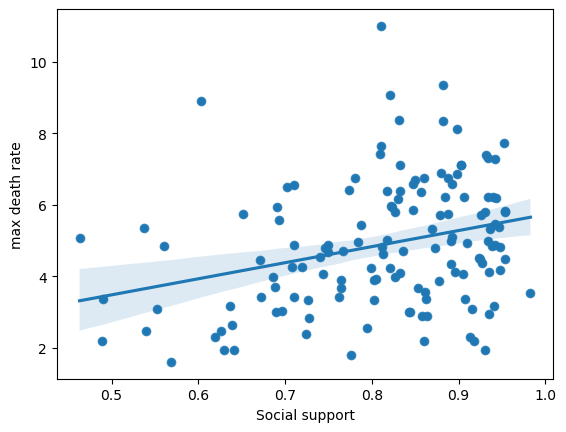

In [254]:
x = data2["Social support"]
y = data2["max death rate"]
sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

#### Max Death Rate vs Healthy Life Expectancy

<br>

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max death rate'>

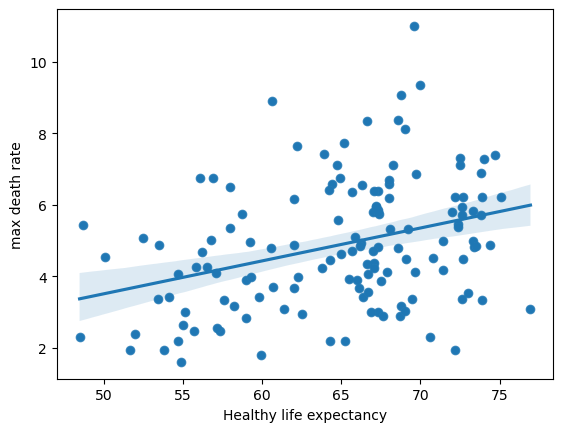

In [255]:
x = data2["Healthy life expectancy"]
y = data2["max death rate"]
sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

<br>

#### Max Death Rate vs Freedome to Make Life Choices

<br>

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max death rate'>

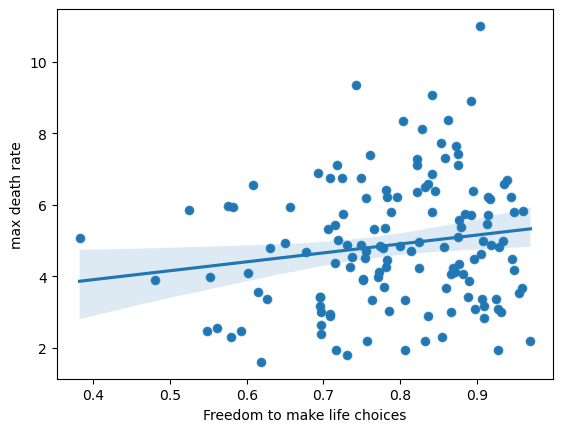

In [256]:
x = data2["Freedom to make life choices"]
y = data2["max death rate"]
sns.scatterplot(x = x, y = np.log(y))
sns.regplot(x = x, y = np.log(y))

### Comparing correlation matrices between Covid infections vs World Happiness Report and Covid deaths vs World Happiness Reports

In [257]:
data.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Logged GDP per capita,1.000000,0.798452,0.872090,0.456510,0.322941
Social support,0.798452,1.000000,0.748850,0.486266,0.236806
Healthy life expectancy,0.872090,0.748850,1.000000,0.493911,0.344605
Freedom to make life choices,0.456510,0.486266,0.493911,1.000000,0.052039
max infection rate,0.322941,0.236806,0.344605,0.052039,1.000000


In [258]:
data2.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max death rate
Logged GDP per capita,1.000000,0.798452,0.872090,0.456510,0.045441
Social support,0.798452,1.000000,0.748850,0.486266,0.018736
Healthy life expectancy,0.872090,0.748850,1.000000,0.493911,0.094749
Freedom to make life choices,0.456510,0.486266,0.493911,1.000000,0.099712
max death rate,0.045441,0.018736,0.094749,0.099712,1.000000


<br>

### Looking at the corresponding p-value to identify statistical relevance p-value),

<br>

In [259]:
x = data["Logged GDP per capita"]
y = data["max infection rate"]
print('GDP vs Infection: ', prs(x, y))

GDP vs Infection:  PearsonRResult(statistic=0.3229409946113675, pvalue=0.00011189919545714305)


In [260]:
x = data2["Logged GDP per capita"]
y = data2["max death rate"]
print('GDP vs Death: ', prs(x, y))

GDP vs Death:  PearsonRResult(statistic=0.04544131288022931, pvalue=0.5966441601065284)


In [261]:
x = data["Social support"]
y = data["max infection rate"]
print('Social support vs Infection: ', prs(x, y))

Social support vs Infection:  PearsonRResult(statistic=0.23680585282010683, pvalue=0.005167144209386814)


In [262]:
x = data2["Social support"]
y = data2["max death rate"]
print('Social support vs Death: ', prs(x, y))

Social support vs Death:  PearsonRResult(statistic=0.018735720590074174, pvalue=0.8273418054906269)


In [263]:
x = data["Healthy life expectancy"]
y = data["max infection rate"]
print('Life Expectancy vs Infection: ', prs(x, y))

Life Expectancy vs Infection:  PearsonRResult(statistic=0.34460458042434017, pvalue=3.490242154829875e-05)


In [264]:
x = data2["Healthy life expectancy"]
y = data2["max death rate"]
print('Life Expectancy vs Death: ', prs(x, y))

Life Expectancy vs Death:  PearsonRResult(statistic=0.09474885413503667, pvalue=0.26898122958103954)


In [265]:
x = data["Freedom to make life choices"]
y = data["max infection rate"]
print('Choice Freedom vs Infection: ', prs(x, y))

Choice Freedom vs Infection:  PearsonRResult(statistic=0.05203898986738528, pvalue=0.5444017960399976)


In [448]:
x = data2["Freedom to make life choices"]
y = data2["max death rate"]
print('Choice Freedom vs Death: ', prs(x, y))

Choice Freedom vs Death:  PearsonRResult(statistic=0.09971213335953946, pvalue=0.24458606247896078)


## Summary of analysis
<br>
Covid death and infection rates along the time-series between the United Kingdom, USA, and Sweden are positively correlated.  Peaks and troughs occur in tandem with the seasonality of covid for all three countries.  This may be due to the seasonality of the covid virus and the climate similarities of the United Kingdom, Sweden and much of the continental USA, better access and resources for recording and reporting the data, and transparency in reporting cannot be ruled out.  We also see a consistent correlation and pattern between spikes in infection rate and death rates.  This pattern is also consistent with India, however, not as consistent.  There are outliers where some surges in death rates do not have a the corresponding surge in infection rates.  This could be due to many non-lethal covid infections going undiagnosed.  China’s infection rate and death rate do not follow the trends seen in the other four countries.  In March and April of 2022 China experienced a large increase in infection rate but there was no significant increase in the death rate.  We also do not see the seasonality displayed in the other four countries.  From early 2020 to late 2021 infection rates stay very close to the y-axis, virtually no infections.  The death rate displayed the same trend but remained unchanged until late 2022.  At the end of 2022 and into 2023 China’s death rate climbed to about 60,000 in a very short period of time.  It does correlate with a spike in infection rates; however, the infection rate peaked at about 80,000.   This translates to roughly a 75% death rate over this period.    This may be due to China’s zero covid policy and strict regulations from 2020 through 2022.  Civil unrest regarding China’s strict regulations started in November 2022, large numbers of people gathered in protest and could have spread covid at an unprecedented rate.  China also has an aging population, in 2018 more than 17% of the population was reported to be over 60 years old.  Considering all variables with health facilities past capacity, the country experiencing its largest surge in infections since the outbreak, a large percent of the population being more at risk of serious complications may have created the massive surge in death rate while leaving many nonlethal cases going unreported.  This would greatly skew the calculated death rate.  The cumulative average death rate for every country is within the expected range, varying from 0.87% - 1.08%.  China is anomalous in comparison to the other countries.  There are varying reasons and explanations as to why, regardless of the reason they are an outlier.
The covid data in relation to the World Health report initially shows a positive correlation in varying degrees across all categories.  For Max Infection vs GDP we see a low moderate correlation and a high statistical relevance in the p-value.  However, in the Max Death Rate vs GDP the correlation is weak, and the statistical relevance is also weak.  Social support vs infection rate shows a weak correlation with significant statistical relevance.  Once again when social support is compared to death rate both the correlation and statistical relevance are weak.  This trend continues for healthy life choices and freedom to make life choices, correlation and the statistical relevance is weak when compared to the death rate.  The difference between correlation and statistical relevance of infection rate and death rate against World Health Report data could be unrecorded/unreported infections.  Infections that lead to death are more likely to be recorded due to the severity of the case leading to a higher necessity of hospitalization or medical help.  
